# Speed comparison

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from ddn3 import simulation
from ddn3_extra import simulation_r, scan_r

%load_ext autoreload
%autoreload 2

In [2]:
from cycler import cycler
default_cycler = (cycler(color=["#1F77B4", "#FF7F0E", "#3A3A3A", "#5CCEB3"]))
plt.rc('axes', prop_cycle=default_cycler)

## DDN and JGL

In [ ]:
n_node = 100
n1, n2 = 50, 50
ratio_diff = 0.25
n_rep = 5
rho1_lst = np.arange(0.05, 1.05, 0.05)
rho2 = 0.1

t_lst = np.zeros((n_rep, len(rho1_lst), 2))
for n in range(n_rep):
    omega, omega1, omega2 = simulation_r.huge_omega(
        n_node=n_node, ratio_diff=ratio_diff, graph_type="scale-free-multi", n_group=4,
    )
    g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
    dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, n1, n2)

    for i, rho1 in enumerate(rho1_lst):
        tic = time.perf_counter()
        t1_lst_ddn, t2_lst_ddn = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2)
        toc = time.perf_counter()
        t_lst[n, i, 0] = toc - tic
        # print(f"DDN {toc - tic:0.4f} seconds")

        tic = time.perf_counter()
        t1_lst_jgl, t2_lst_jgl = scan_r.scan_jgl(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2)
        toc = time.perf_counter()
        t_lst[n, i, 1] = toc - tic
        # print(f"JGL {toc - tic:0.4f} seconds")


In [ ]:
np.savez(f'timing_ddn_jgl_n-node_{n_node}_n1_{n1}_n2_{n2}', dat1=dat1, dat2=dat2, t_lst=t_lst)

Plot

In [ ]:
# temp = np.load("../output_simulation/speed/timing_ddn_jgl_n-node_400_n1_200_n2_200.npz")
temp = np.load("../output_simulation/speed/timing_ddn_jgl_n-node_200_n1_200_n2_200.npz")
# temp = np.load("../output_simulation/speed/timing_ddn_jgl_n-node_100_n1_200_n2_200.npz")
t_lst200 = temp['t_lst']

In [ ]:
rho1_lst = np.arange(0.05, 1.05, 0.05)
t_lst200_mean = np.mean(t_lst200, axis=0)
# t_lst50_mean = np.mean(t_lst50, axis=0)
print(np.sum(t_lst200_mean, axis=0))
# print(np.sum(t_lst50_mean, axis=0))

In [ ]:
plt.plot(rho1_lst, t_lst200_mean[:,0], label='DDN 3.0')
plt.plot(rho1_lst, t_lst200_mean[:,1], label="JGL")
plt.xlabel("$\lambda1$")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("./sim_fig_out/speed_jgl_node_200.png")


In [ ]:
# plt.plot(rho1_lst, t_lst_mean[:,1]/t_lst_mean[:,0])

## DINGO

In [4]:
n_node = 200
n1, n2 = 50, 50
ratio_diff = 0.25
n_rep = 1
rho1_lst = np.arange(0.05, 1.05, 0.05)
# rho2 = 0.1

t_lst = np.zeros((n_rep, len(rho1_lst)))
for n in range(n_rep):
    omega, omega1, omega2 = simulation_r.huge_omega(
        n_node=n_node, ratio_diff=ratio_diff, graph_type="scale-free-multi", n_group=4,
    )
    g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
    dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, n1, n2)

    for i, rho1 in enumerate(rho1_lst):
        print(rho1)
        tic = time.perf_counter()
        t1_dingo, t2_dingo, comm_dingo, diff_dingo, _ = scan_r.scan_dingo(dat1, dat2, B=10, rho=rho1, cores=10)
        toc = time.perf_counter()
        t_lst[n, i] = toc - tic

np.savez(f'timing_dingo_n-node_{n_node}_n1_{n1}_n2_{n2}', dat1=dat1, dat2=dat2, t_lst=t_lst)

0.05
Step 1 of DINGO is finished at Sat Jan  6 08:47:51 2024 
Step 2 of DINGO is finished at Sat Jan  6 08:49:57 2024 
Bootstrap scoring is started at Sat Jan  6 08:49:57 2024 
Bootstrap scoring is done at Sat Jan  6 08:50:50 2024 
rho is  [1] 0.05

0.1
Step 1 of DINGO is finished at Sat Jan  6 08:50:51 2024 
Step 2 of DINGO is finished at Sat Jan  6 08:52:15 2024 
Bootstrap scoring is started at Sat Jan  6 08:52:15 2024 
Bootstrap scoring is done at Sat Jan  6 08:53:44 2024 
rho is  [1] 0.1

0.15000000000000002
Step 1 of DINGO is finished at Sat Jan  6 08:53:44 2024 
Step 2 of DINGO is finished at Sat Jan  6 08:56:24 2024 
Bootstrap scoring is started at Sat Jan  6 08:56:24 2024 
Bootstrap scoring is done at Sat Jan  6 08:57:38 2024 
rho is  [1] 0.15

0.2
Step 1 of DINGO is finished at Sat Jan  6 08:57:39 2024 
Step 2 of DINGO is finished at Sat Jan  6 08:58:10 2024 
Bootstrap scoring is started at Sat Jan  6 08:58:10 2024 
Bootstrap scoring is done at Sat Jan  6 08:59:50 2024 
rho is

In [12]:
f0 = '../output_simulation/speed/timing_dingo_n-node_200_n1_50_n2_50.npz'
t_lst_dingo = np.load(f0)['t_lst']
np.sum(t_lst_dingo)

3200.433781799162

Plot

In [5]:
f0 = '../output_simulation/speed/timing_dingo_n-node_200_n1_50_n2_50.npz'
t_lst_dingo = np.load(f0)['t_lst']
f1 = '../output_simulation/speed/timing_ddn_jgl_n-node_200_n1_50_n2_50.npz'
t_lst_ddn_jgl = np.load(f1)['t_lst']
t_lst_ddn_jgl = np.mean(t_lst_ddn_jgl, axis=0)

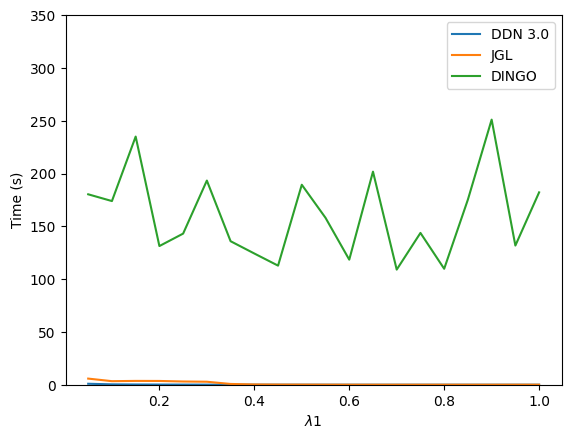

In [8]:
rho1_lst = np.arange(0.05, 1.05, 0.05)
plt.plot(rho1_lst, t_lst_ddn_jgl[:, 0], label="DDN 3.0")
plt.plot(rho1_lst, t_lst_ddn_jgl[:, 1], label="JGL")
plt.plot(rho1_lst, t_lst_dingo[0, :], label="DINGO")
plt.ylim([0,350])
plt.xlabel("$\lambda1$")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("./figures/speed_dingo_200.png")

In [ ]:
print(np.sum(t_lst_dingo))

## DDN and DDN 3.0

In [10]:
n_node = 200
n1, n2 = 50, 50
ratio_diff = 0.25
n_rep = 2
rho1_lst = np.arange(0.05, 1.05, 0.05)
rho2 = 0.1

In [ ]:
t_lst = np.zeros((n_rep, len(rho1_lst), 3)) - 100

for n in range(n_rep):
    omega, omega1, omega2 = simulation_r.huge_omega(
        n_node=n_node, ratio_diff=ratio_diff, graph_type="scale-free-multi", n_group=4,
    )
    g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
    dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, n1, n2)

    for i, rho1 in enumerate(rho1_lst):
        print(n, i)
        tic = time.perf_counter()
        t1_lst_ddn1, t2_lst_ddn1 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='resi')
        toc = time.perf_counter()
        t_lst[n, i, 0] = toc - tic

        tic = time.perf_counter()
        t1_lst_ddn1, t2_lst_ddn1 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='corr')
        toc = time.perf_counter()
        t_lst[n, i, 1] = toc - tic

        tic = time.perf_counter()
        t1_lst_ddn3, t2_lst_ddn3 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='org')
        toc = time.perf_counter()
        t_lst[n, i, 2] = toc - tic


In [ ]:
np.savez(f'timing_ddn3resi_ddn3corr_ddn2_n-node_{n_node}_n1_{n1}_n2_{n2}', dat1=dat1, dat2=dat2, t_lst=t_lst)

In [ ]:
np.sum(np.mean(t_lst, axis=0),axis=0)

Plot

In [7]:
# import os
# os.path.isdir("../../../x_output/")

True

In [8]:
# f0 = '../output_simulation/speed/timing_ddn3resi_ddn3corr_ddn2_n-node_100_n1_50_n2_50.npz'
# f0 = '../output_simulation/speed/timing_ddn3resi_ddn3corr_ddn2_n-node_200_n1_50_n2_50.npz'
f0 = '../../../x_output/ddn/speed/timing_ddn3resi_ddn3corr_ddn2_n-node_200_n1_50_n2_50.npz'
t_lst_ddn = np.load(f0)['t_lst']
t_lst_ddn = np.mean(t_lst_ddn, axis=0)

In [ ]:
# np.sum(t_lst_ddn, axis=0)

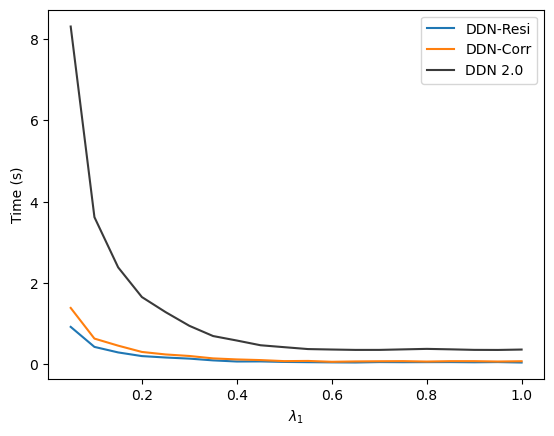

In [12]:
plt.plot(rho1_lst, t_lst_ddn[:,0], label='DDN-Resi')
plt.plot(rho1_lst, t_lst_ddn[:,1], label='DDN-Corr')
plt.plot(rho1_lst, t_lst_ddn[:,2], label='DDN 2.0')
plt.legend()
plt.xlabel('$\lambda_1$')
plt.ylabel("Time (s)")
plt.savefig("./sim_fig_out/speed_ddn3_ddn2_lambda1.png")

## DDN Impact of feature number
Fix lambda1 and lambda2

In [13]:
n_node_lst = np.array([100, 200, 500, 1000, 2000])[::-1]
n1, n2 = 100, 100

rho1 = 0.3
rho2 = 0.1

In [ ]:
t_lst = np.zeros((len(n_node_lst), 3)) - 100

for n, n_node in enumerate(n_node_lst):
    print(n)

    omega, omega1, omega2 = simulation_r.huge_omega(
        n_node=n_node, ratio_diff=0.25, graph_type="scale-free-multi", n_group=4,
    )
    g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
    dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, n1, n2)

    tic = time.perf_counter()
    t1_lst_ddn1, t2_lst_ddn1 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='resi')
    toc = time.perf_counter()
    t_lst[n, 0] = toc - tic

    tic = time.perf_counter()
    t1_lst_ddn1, t2_lst_ddn1 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='corr')
    toc = time.perf_counter()
    t_lst[n, 1] = toc - tic

    tic = time.perf_counter()
    t1_lst_ddn3, t2_lst_ddn3 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='org')
    toc = time.perf_counter()
    t_lst[n, 2] = toc - tic

    print(t_lst[n])


In [ ]:
np.savez(f'timing_ddn3resi_ddn3corr_ddn2_feature_n-node_{n_node}_n1_{n1}_n2_{n2}', dat1=dat1, dat2=dat2, t_lst=t_lst, n_node_lst=n_node_lst)

Plot

In [15]:
temp = np.load("../../../x_output/ddn/speed/timing_ddn3resi_ddn3corr_ddn2_feature_n-node_100_n1_100_n2_100.npz")
# temp = np.load("../output_simulation/speed/timing_ddn3resi_ddn3corr_ddn2_feature_n-node_100_n1_100_n2_100.npz")
t_lst = temp['t_lst']

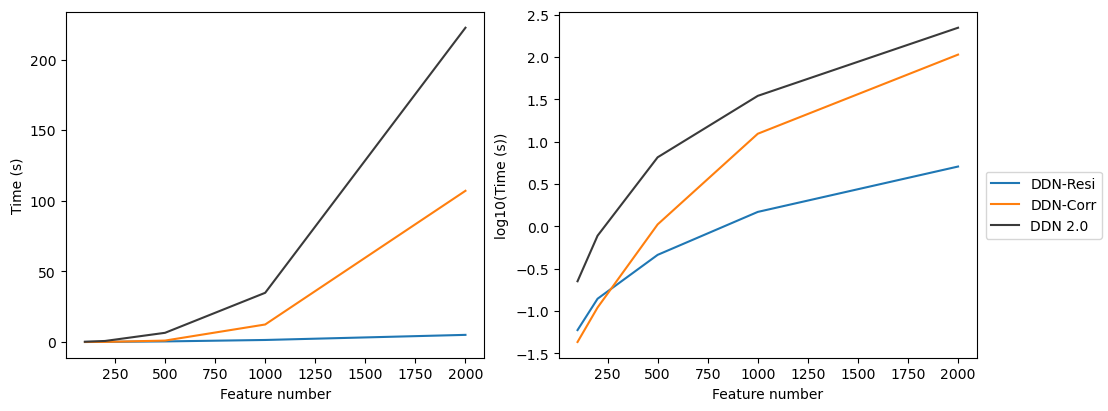

In [16]:
n_node_lst = np.array([100, 200, 500, 1000, 2000])[::-1]
fig, ax = plt.subplots(1,2,figsize=(11,4), layout="constrained")
ax[0].plot(n_node_lst, t_lst)
ax[1].plot(n_node_lst, np.log10(t_lst))
ax[0].set_xlabel("Feature number")
ax[0].set_ylabel("Time (s)")
ax[1].set_xlabel("Feature number")
ax[1].set_ylabel("log10(Time (s))")
fig.legend(['DDN-Resi', 'DDN-Corr', 'DDN 2.0'], loc="outside right center")
fig.savefig("./sim_fig_out/speed_ddn3_ddn2_feature.png")

## DDN impact of sample number

In [17]:
n_node = 100
n_sample_lst = np.array([100, 200, 500, 1000, 2000, 5000, 10000])[::-1]

rho1 = 0.3
rho2 = 0.1


In [ ]:
t_lst = np.zeros((len(n_sample_lst), 3)) - 100

for n, n_sample in enumerate(n_sample_lst):
    print(n)

    omega, omega1, omega2 = simulation_r.huge_omega(
        n_node=n_node, ratio_diff=0.25, graph_type="scale-free-multi", n_group=4,
    )
    g1_cov, g2_cov, comm_gt, diff_gt = simulation.prep_sim_from_two_omega(omega1, omega2)
    dat1, dat2 = simulation.gen_sample_two_conditions(g1_cov, g2_cov, n_sample, n_sample)

    tic = time.perf_counter()
    t1_lst_ddn1, t2_lst_ddn1 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='resi')
    toc = time.perf_counter()
    t_lst[n, 0] = toc - tic

    tic = time.perf_counter()
    t1_lst_ddn1, t2_lst_ddn1 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='corr')
    toc = time.perf_counter()
    t_lst[n, 1] = toc - tic

    tic = time.perf_counter()
    t1_lst_ddn3, t2_lst_ddn3 = scan_r.scan_ddn(dat1, dat2, lambda1_rg=[rho1], lambda2=rho2, mthd='org')
    toc = time.perf_counter()
    t_lst[n, 2] = toc - tic

    print(t_lst[n])


In [ ]:
np.savez(f'timing_ddn3resi_ddn3corr_ddn2_sample_n-node_{n_node}_n1_{n1}_n2_{n2}', dat1=dat1, dat2=dat2, t_lst=t_lst, n_node_lst=n_node_lst)

Plot

In [18]:
temp = np.load("../../../x_output/ddn/speed/timing_ddn3resi_ddn3corr_ddn2_sample_n-node_100_n1_100_n2_100.npz")
# temp = np.load("../output_simulation/speed/timing_ddn3resi_ddn3corr_ddn2_sample_n-node_100_n1_100_n2_100.npz")
t_lst = temp['t_lst']

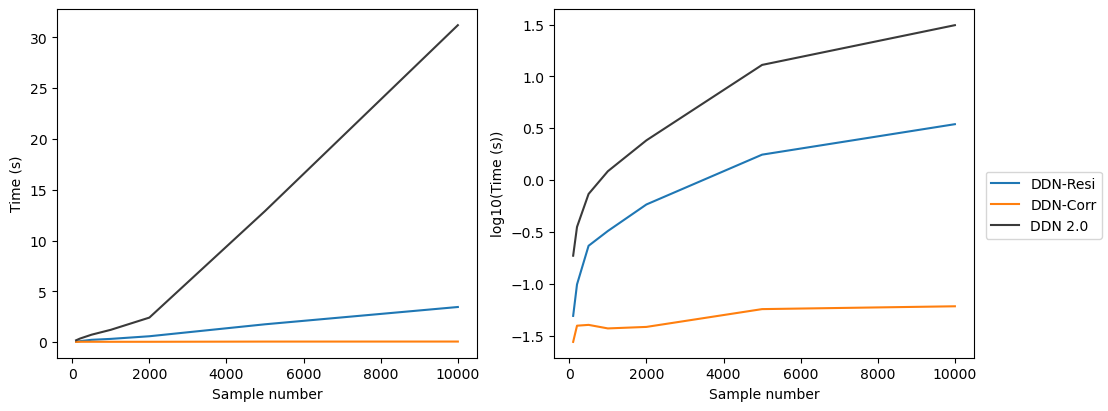

In [19]:
n_sample_lst = np.array([100, 200, 500, 1000, 2000, 5000, 10000])[::-1]
fig, ax = plt.subplots(1,2,figsize=(11,4), layout="constrained")
ax[0].plot(n_sample_lst, t_lst)
ax[1].plot(n_sample_lst, np.log10(t_lst))
ax[0].set_xlabel("Sample number")
ax[0].set_ylabel("Time (s)")
ax[1].set_xlabel("Sample number")
ax[1].set_ylabel("log10(Time (s))")
fig.legend(['DDN-Resi', 'DDN-Corr', 'DDN 2.0'], loc="outside right center")
fig.savefig("./sim_fig_out/speed_ddn3_ddn2_sample.png")